The purpose of this project is to analyze a dataset of adult incomes and determine if I can find patterns and make predictions in the data.  My focus is going to be how different variables affect income, including education, gender, occupation, among other variables that I might consider impactful.  This dataset comes from kaggle.  I am first going to load anything that I might use and look at the dataset to see what I can use.  I will also use this to figure out what path I want to take in exploring the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
income = pd.read_csv('adult.csv')
income.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The first thing I notice is that a majority of the dataset is categorical.  This will limit me on the varieties in which I can present the data visually, but it is still useful.  The second thing I notice is that income is only split into two categories, more than 50,000, and less than $50,000.  I am not going to be able to determine as much in income range as I would like, but I can still compare lower versus higher salaries using this.  

I also tried to do research on the dataset to find out what some of these columns represent, but unfortunately I could not get the information I needed.  I am going to start with hours per week and compare it to the income because it is the one of the only continuous variables that I am interested in using, along with age.  I am predicting that people that make more typically work longer per week.

I will use almost extensively violin plots, boxplots, and bar graphs to visualize my categorical data.

In [4]:
income['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
income['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

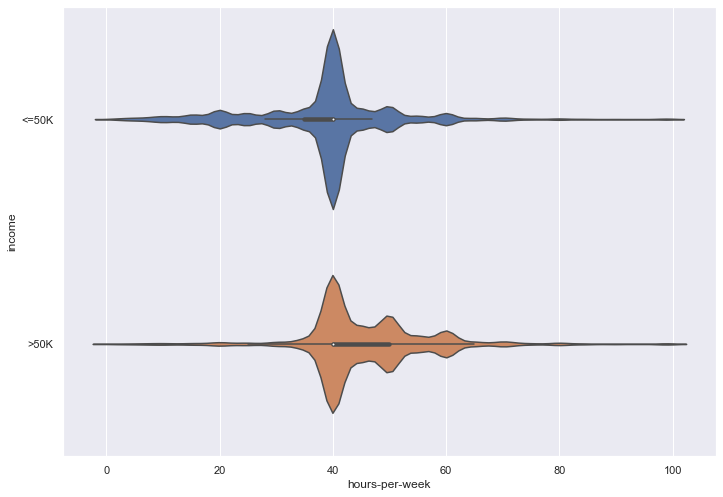

In [59]:
sns.violinplot(data=income, x='hours-per-week',y='income')
plt.show()

This data confirms my initial thoughts.  There are a lot more people with lower incomes than higher, and those that make higher incomes typically work longer hours. The most common work week is the typical 40 hours, but I was surprised at some of the long work weeks that some people put in.

My next interest was education.  I feel like the higher the education, the more likely someone is going to make over $50,000.  I am going to look at the data and see what I can do with it.

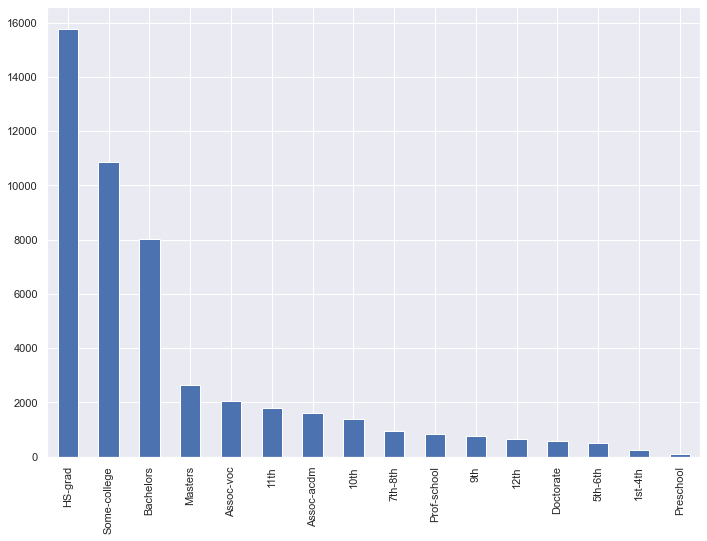

In [27]:
income['education'].value_counts().plot(kind='bar')

I know that people often work while they are in high school, but the fact that this dataset includes grades from pre-school up was unusual to me.  I decided to eliminate rows where they are still in grade school, so I can focus potentially more on careers.

In [10]:
higher = ['HS-grad','Assoc-acdm','Some_college','Prof-school','Bachelors','Masters','Doctorate','Assoc-voc']
higher_inc=income[income['education'].apply(lambda  x: x in higher)]
higher_inc

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


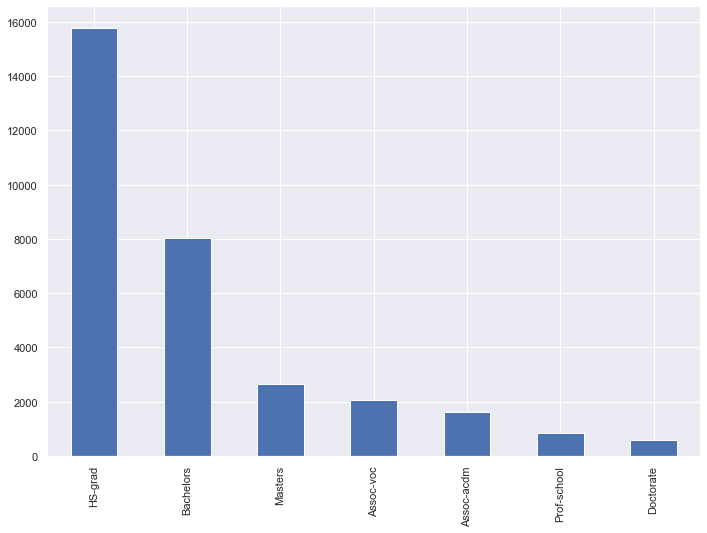

In [28]:
higher_inc['education'].value_counts().plot(kind='bar')

I like this data better, and I will use it for the remainder of the investigation.  I will use another bar chart for this.  I predict that people with lower levels of education will make less.

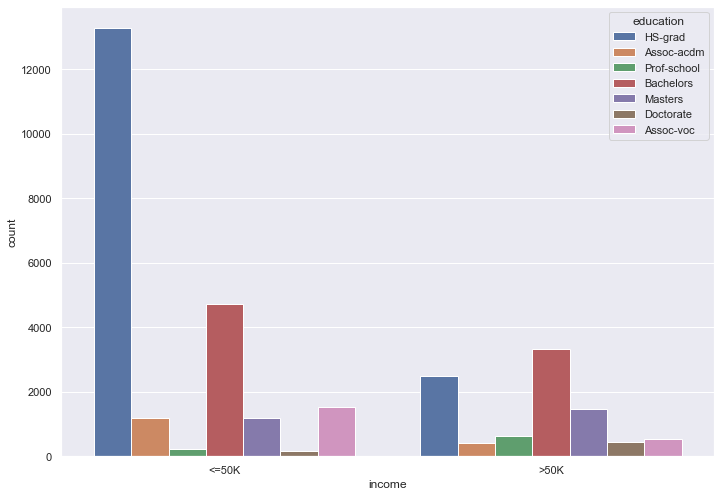

In [62]:
sns.countplot(data=higher_inc, x='income', hue='education')

This graph might be a little misleading since high school graduates and those with a bachelors degree make up such a high amount of the data, but the trend does seem to be that they typically make less.  I was surprised that the amount of masters degrees made less than $50,000 as well. 

Now I would like to take this data and add a third variable, hours worked per week, to see if any patterns emerge.

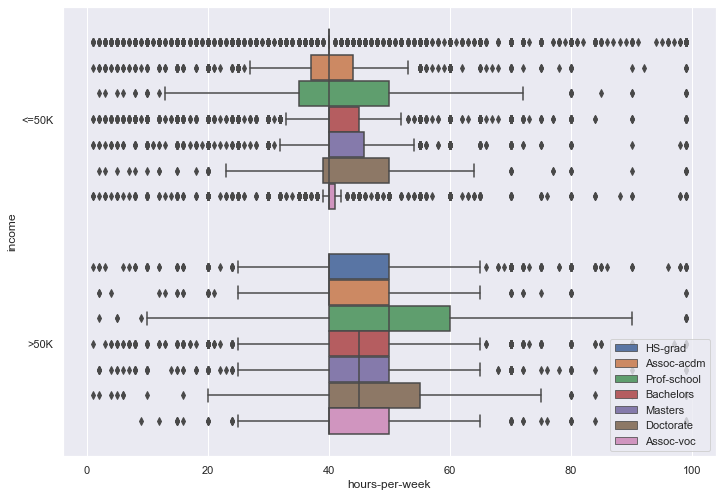

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=higher_inc, x='hours-per-week',y='income', hue='education')
plt.legend(loc='lower right')
plt.show()

Those in professional school and with doctorates typically work the longest, and are rewarded with her wages.  I was interested that high school graduates that make less than $50,000 mostly work exactly 40 hours a week.  I feel like this dataset has a lot of outliers, with people apparently working very few hours, and some working 100. I would hope that working 14 hours a day for 7 days a week is not realistic.

The categorical values that got my attention were race, working class, occupation, gender, and marital status.  I was interested to see how these affected salary.  I want to look at the data of each.

Text(0.5, 1.0, 'Marital Status')

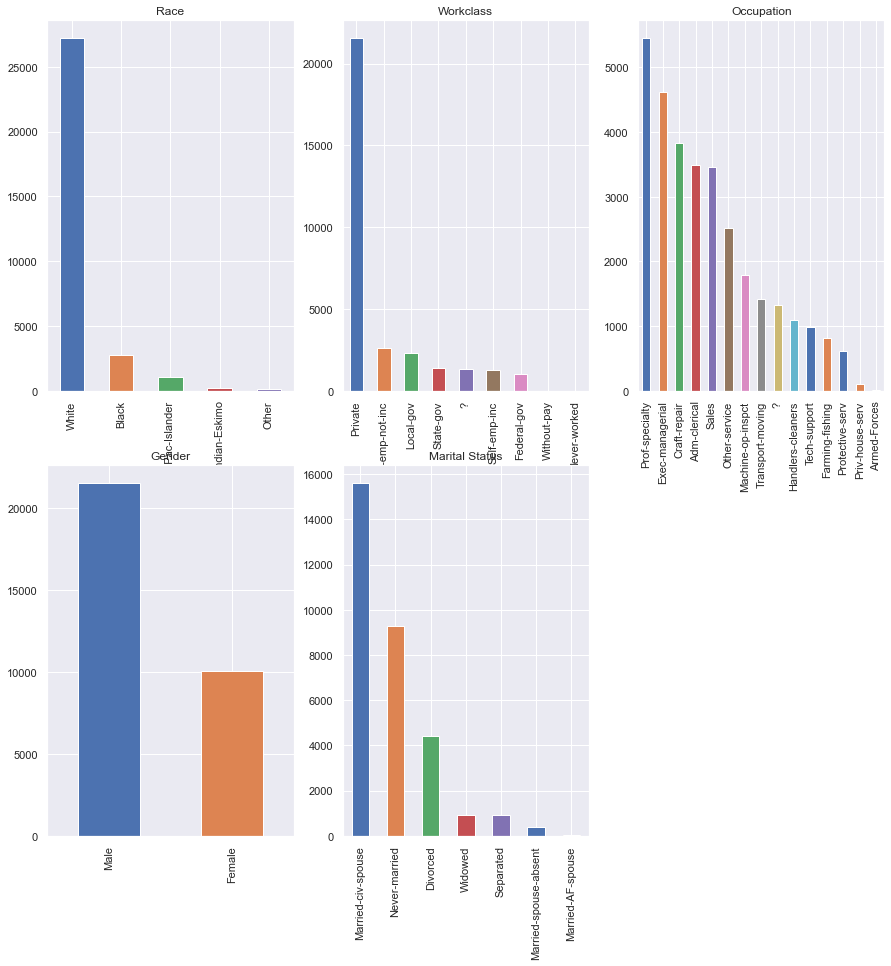

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1);higher_inc['race'].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4']);plt.title('Race')
plt.subplot(2,3,2);higher_inc['workclass'].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('Workclass')
plt.subplot(2,3,3);higher_inc['occupation'].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11']);plt.title('Occupation')
plt.subplot(2,3,4);higher_inc['gender'].value_counts().plot(kind='bar', color=['C0','C1']);plt.title('Gender')
plt.subplot(2,3,5);higher_inc['marital-status'].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4']);plt.title('Marital Status')

The overwhelming majority of race was white, but I'd still like to compare it to the other races.<br>
Workclass was mostly private, and could be repetitive with occupation, but I will still see how it compares.<br>
I liked that occupations were more spread out and diverse, so this seems the most useful so far.<br>
Males more than doubled the count of females, but I am curious if the data will show that males do make more.<br>
Marital status was not one my initial comparison factors, but I am also curious if those in households that are married make more.  I'm going to use the same boxplot method as before, using price and hours worked.

Native country was initially of interest, but it is almost overwhelmingly United States, with the next closest being unknown, that I felt like it did not have enough data to be useful.

In [45]:
higher_inc['native-country'].value_counts()

United-States                 28693
?                               589
Mexico                          250
Philippines                     203
Germany                         143
Canada                          129
India                           122
England                         102
China                            97
Puerto-Rico                      92
South                            84
Cuba                             79
Japan                            71
Jamaica                          65
Italy                            61
Poland                           60
Taiwan                           59
Columbia                         55
El-Salvador                      52
Vietnam                          50
Iran                             47
Dominican-Republic               38
Haiti                            36
Greece                           33
France                           31
Portugal                         30
Peru                             29
Ireland                     

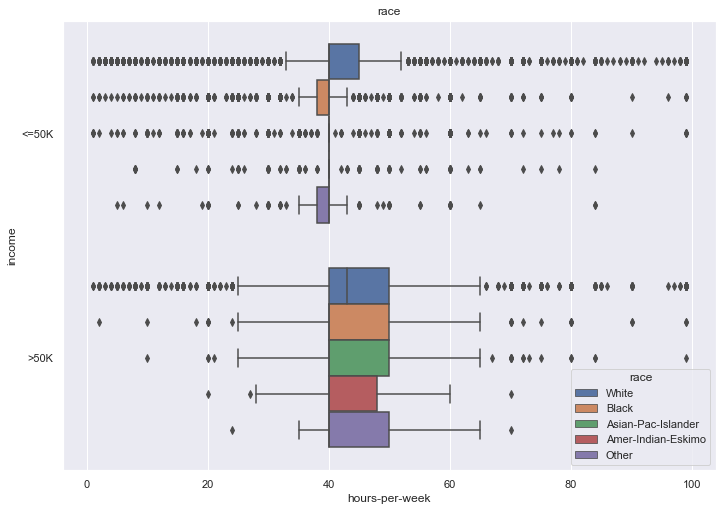

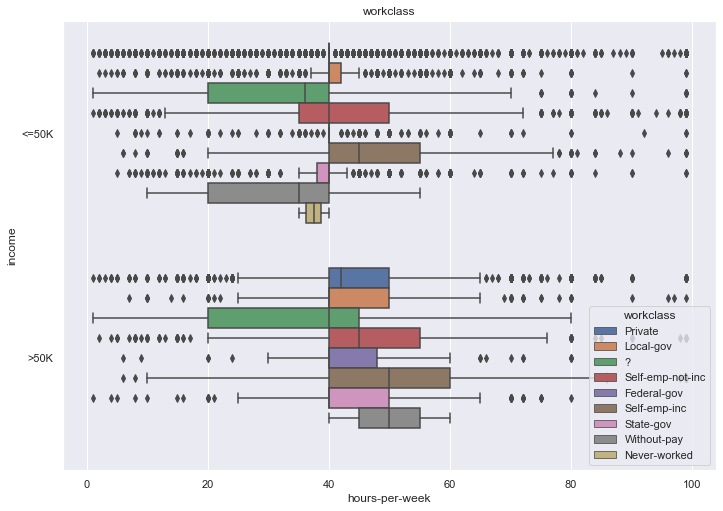

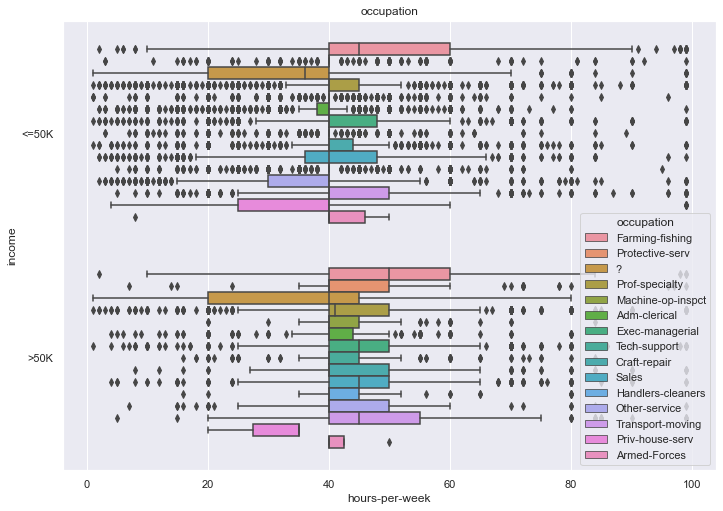

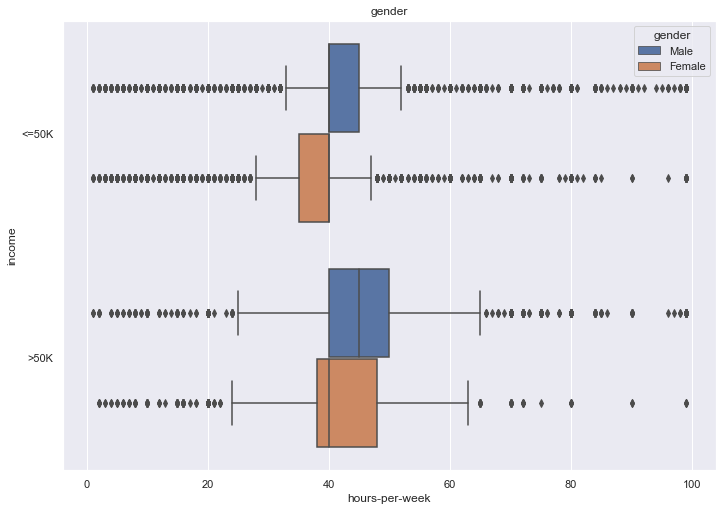

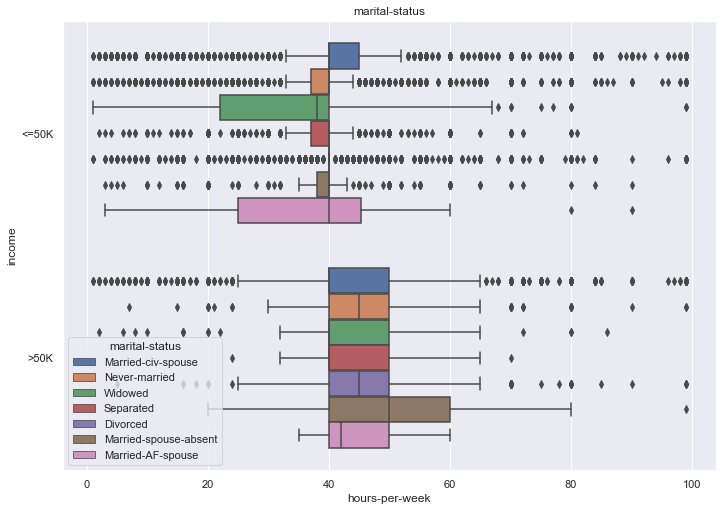

In [50]:
hues = ['race', 'workclass', 'occupation', 'gender', 'marital-status']
for x in hues:
    sns.boxplot(data=higher_inc, x='hours-per-week',y='income', hue=x)
    plt.title(x)
    plt.show()

It's a little hard to visualize a lot of this and what it means.  I am going to also use general bar graphs of each of the data of interest, and use both of them at the same time to determine patterns.

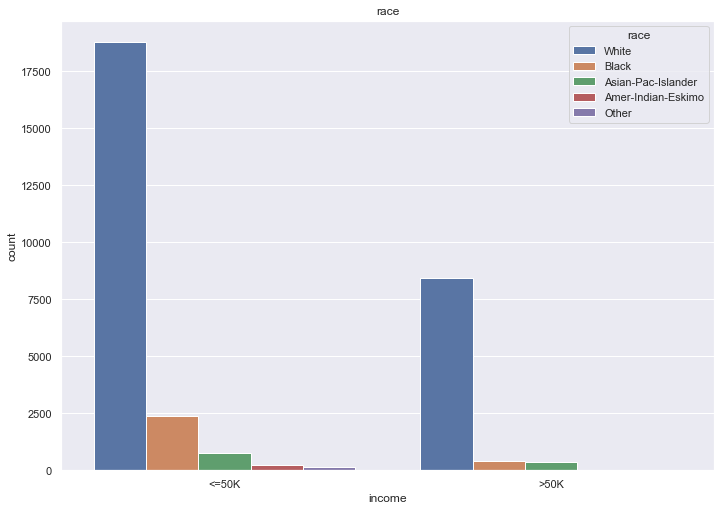

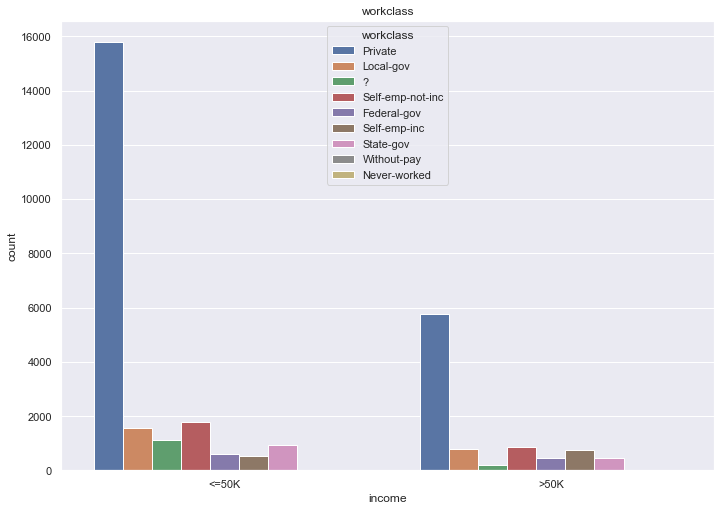

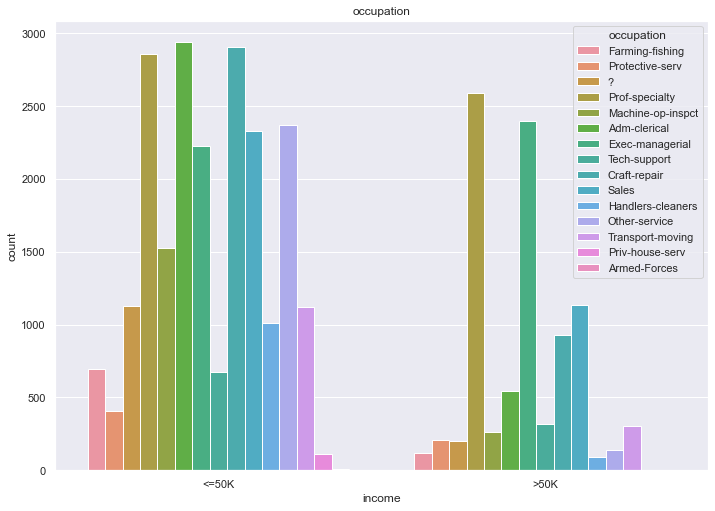

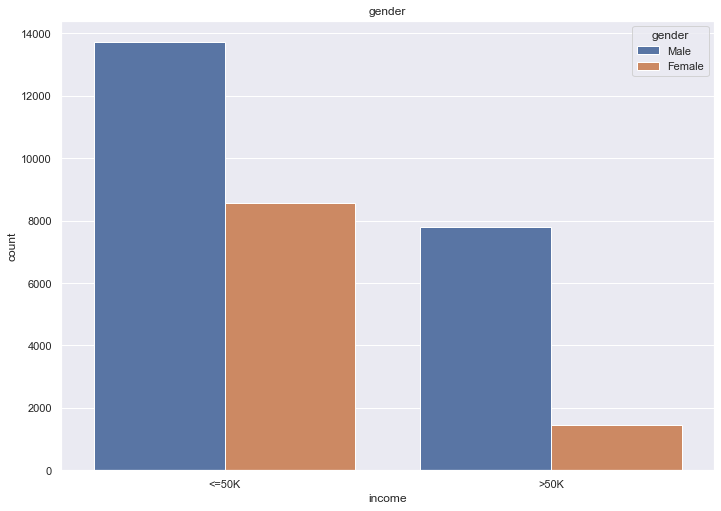

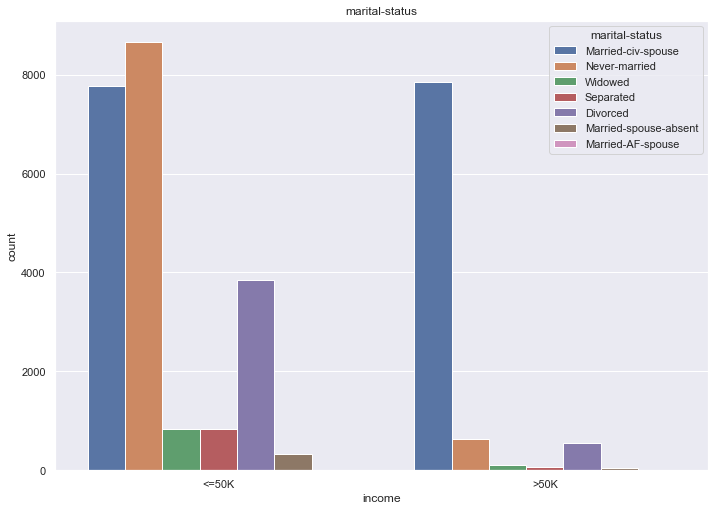

In [51]:
for y in hues:
    sns.countplot(data=higher_inc, x='income', hue=y)
    plt.title(y)
    plt.show()

When comparing race to income, I noticed that working longer hours typically provides higher pay fairly equally across all races. However, the proportion of people that are non-White making over $50,000 is very low compared to those who are White, with Native American making up almost none of this.  This leads me to believe that race is a factor in salary, and would be worth investigating further.  

When I look at working class, I notice that those two are self-employed tend to work longer hours, but it does not always equal more pay.  I would love to see more information on the unknown variables because they tend to work a lot less.  Working for the government is beneficial.

When I look at occupation, which might give me more insight into careers than working class, this has a lot more detailed data. Working as private house service does not make as much, which is predictable. Tech support and having a specialty are the most beneficial for higher pay, and apparently having a specialty can also be working less hours.

Gender was one of the things I wanted to visualize the most.  The proportion of men that make higher than $50,000 is much higher than women, and this data would seem to confirm that men usually make more than women.  Men typically work longer than women in both pay categories.

Interesting points that could be taken from the marriage status are that married people are more the most likely to make over 50,000 by a wide margin.  In fact, all other statuses make up a small portion of the over $50,000 category.  One is much more likely to make less if they have never been married.  I would like to test that further to see how that correlates with age.

That leads me to investigate the other continuous variable that I have not spent time on, which is the age of the subjects.  It might have a strong correlation with marital status, but I'd like to see how it corresponds with pay as well.

In [69]:
higher_inc['age'].value_counts()

35    967
36    955
33    947
34    927
37    908
     ... 
85      5
87      3
88      3
89      1
86      1
Name: age, Length: 74, dtype: int64

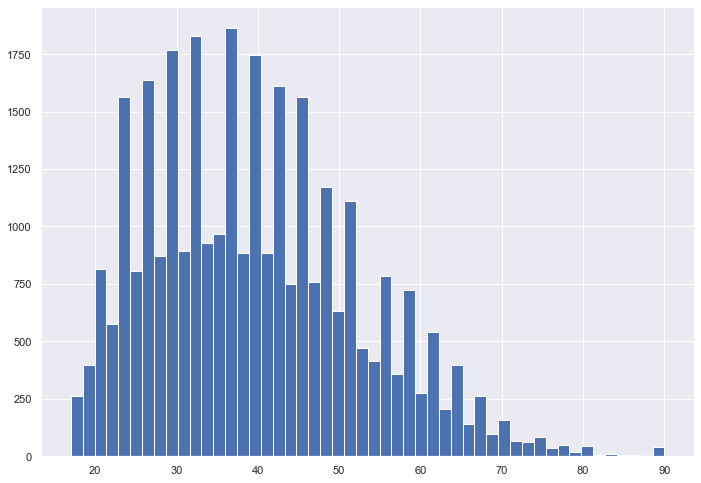

In [70]:
plt.hist(higher_inc['age'], bins=50)
plt.show()

This was very predictable. The core of the work force increases into the 30s and 40s, and then there is a slow decline, presumably as people retire. A scatterplot might be useful to compare ages to hours worked per week.  I would predict that hours worked per week also shows a similar pattern.

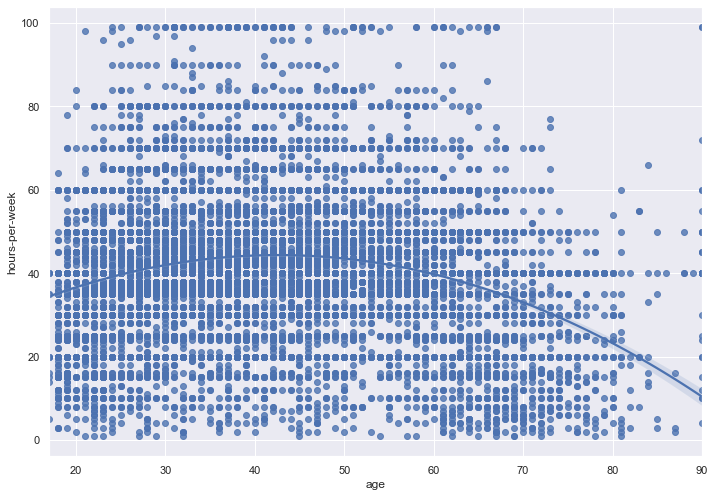

In [75]:
sns.regplot(x='age',y='hours-per-week',data=higher_inc, order=2)

With so many datapoints, it is hard to notice a pattern, but this does seem to follow a similar pattern as the histogram of just age.  Workers tend to longer into their 30s and 40s, then the number of hours gradually decreases.

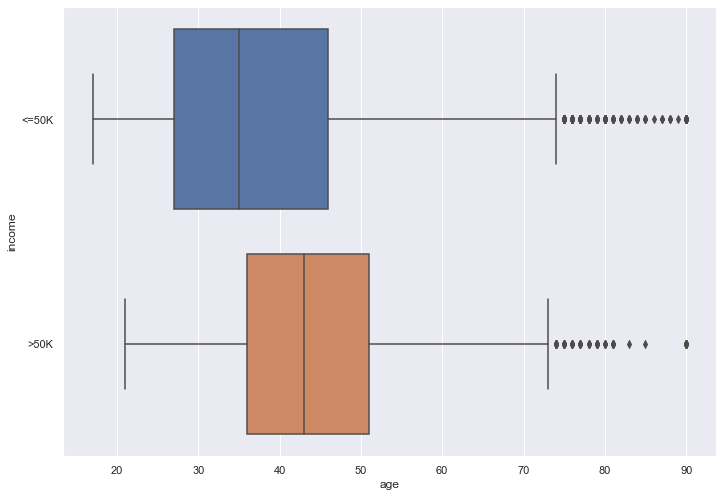

In [76]:
sns.boxplot(data=higher_inc, x='age',y='income')

Those that are younger tend to make less.  This is also predictable, since people typically make more with more experience gained.

I am also curious if there is a pattern with gender and type of occupation, so I wanted to look at that as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

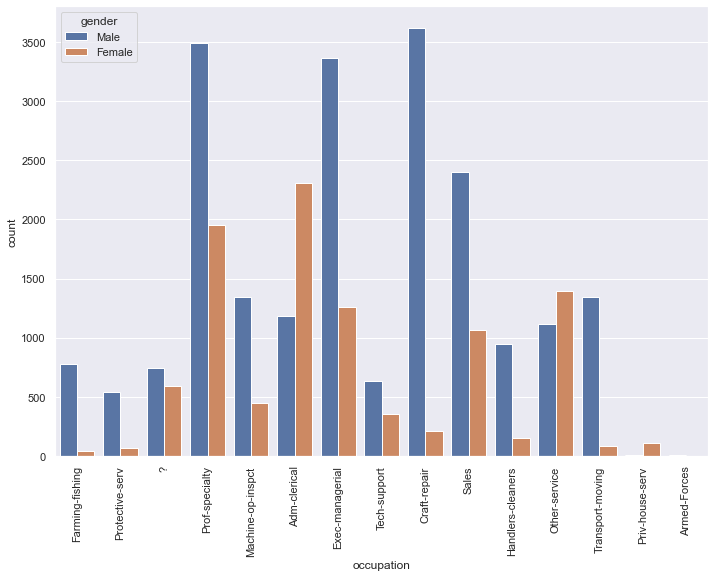

In [56]:
sns.countplot(data=higher_inc, x='occupation', hue='gender')
plt.xticks(rotation=90)

Females are more likely to be clerical, in the service industry, or provide private housing service than males, and women have a high rate of specialty careers, but most of the other information seems pretty standard since the data has so many more males than females.

As a last check before summarizing the data, how does education affect occupation?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

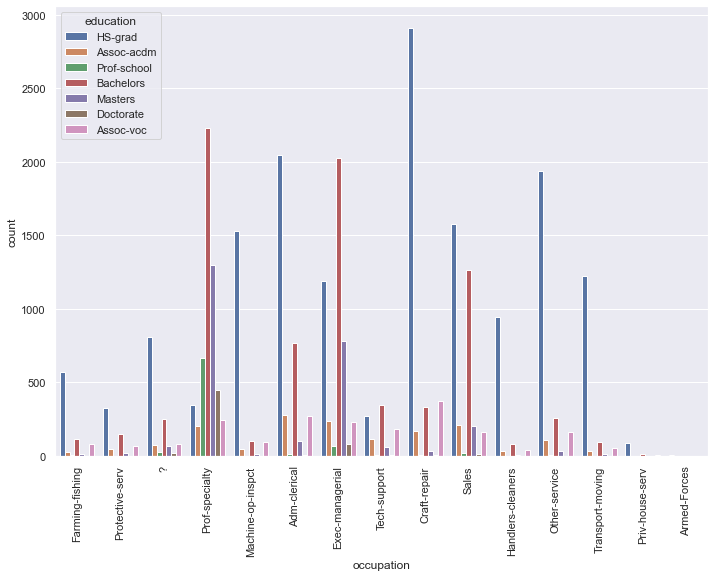

In [58]:
sns.countplot(data=higher_inc, x='occupation', hue='education')
plt.xticks(rotation=90)

Higher degrees tend to have potentially higher paying jobs, like a specialty or managing position.  High school graduates have a higher rate of farming, clerical, machine inspection, transportation, and repair.

To make conclusions from the information given, most of the big takeaways are what many might have predicted prior to seeing the information.<br>
-Higher education and specialization lead to higher salary<br>
-Race does play a factor in salary.  Being non-White greatly reduces the likelihood of making a higher salary.<br>
-Gender plays a role in salary.  Males make more than females.<br>
-Higher age increases the likelihood of a higher salary.

More information could be obtained if the salary range was greater and there was more diversity to some of the categories, like occupation .  However the data confirmed my predictions that I made prior to investigating.